In [22]:
import pandas as pd
import plotly.express as px
import cv2

In [2]:
df = pd.read_csv('../data/interim/annotations.csv')
df.head()

,xmin,ymin,xmax,ymax,name,file,width,height
0,28,55,46,71,with_mask,maksssksksss737,400,226
1,98,62,111,78,with_mask,maksssksksss737,400,226
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226
3,293,59,313,80,with_mask,maksssksksss737,400,226
4,352,51,372,72,with_mask,maksssksksss737,400,226


Количество лиц в датасете

In [13]:
len(df)

4072

Количество уникальных файлов в датасете

In [15]:
len(df['file'].unique())

853

Распределение лиц по файлам

In [17]:
fig = px.histogram(df, x="file")
fig.show()

In [18]:
df['file'].value_counts().nlargest(5)

maksssksksss603    115
maksssksksss518     83
maksssksksss240     61
maksssksksss260     53
maksssksksss52      51
Name: file, dtype: int64

Распределение лиц по классам

In [6]:
fig = px.histogram(df, x="name")
fig.show()

Распределение размера изображений

In [19]:
fig = px.histogram(df, x="width")
fig.show()

In [21]:
fig = px.histogram(df, x="height")
fig.show()

Отображение лиц на изображении


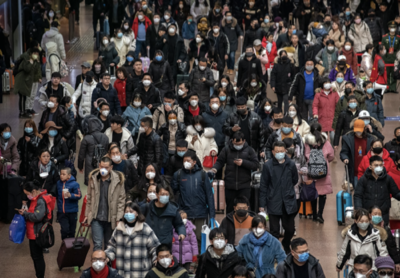

In [25]:
original_image  = cv2.cvtColor(cv2.imread('../data/raw/images/maksssksksss603.png'), cv2.COLOR_BGR2RGBA)
px.imshow(original_image)

In [28]:
bboxes = df[df['file'] == 'maksssksksss603']
bboxes.head()

,xmin,ymin,xmax,ymax,name,file,width,height
2135,49,11,55,17,with_mask,maksssksksss603,400,278
2136,32,52,40,60,with_mask,maksssksksss603,400,278
2137,52,76,61,86,without_mask,maksssksksss603,400,278
2138,47,98,58,109,with_mask,maksssksksss603,400,278
2139,68,100,75,111,with_mask,maksssksksss603,400,278



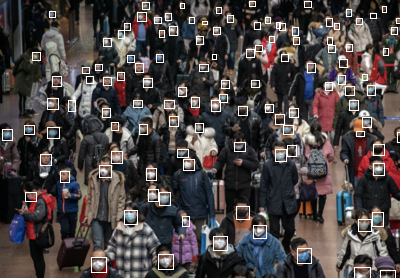

In [34]:
bboxed_image  = original_image.copy()
for row in bboxes.iterrows():
    current_row = row[1]
    image = cv2.rectangle(bboxed_image, (int(current_row['xmin']), int(current_row['ymin'])), (int(current_row['xmax']), int(current_row['ymax'])), (255,255,0), 1)
px.imshow(bboxed_image)